<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu_5_2_%EB%B2%94%EC%A3%BC%ED%99%94_%ED%91%9C%EC%A4%80%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 가공, 핸들링 등 다양한 이름으로 불림
원시적인 형태를 나에게 필요한 방법으로 변환 하는 작업
탐색 하는 과정을 하다 보면,  데이터를 고칠 필요성이 있는 곳이 보이게 됨

1) 문자로 된 범주형 데이터를  숫자로 표현
2) 월요일은 1, 화룡일은 2로 인코딩,
3) 수치 데이터의 분표를 정규화 한다
4) range 값이 다른 것을 (10점 만점과 vs. 100점 만점) 처리한 데이터를 같이 활용하기 이해서는 동일한 분포로 변환해야 한다.


범주화 , 이산형화
연속형 변수를 범주형 변수형으로 변환하는 작업
**몇개의 범주로 나눌지?** 와 **어떤 기준으로 나눌지**? 를 정하는 것이 중요하다.

조건문, cut , qcut  방식을 이용해서 처리한다.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = [ ["A", 52],["B", 92],["C",84], ["D",71], ["M",65], ["YY",81], ["SK",66],["BY",77],["MS",73],["BY",74]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   record  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


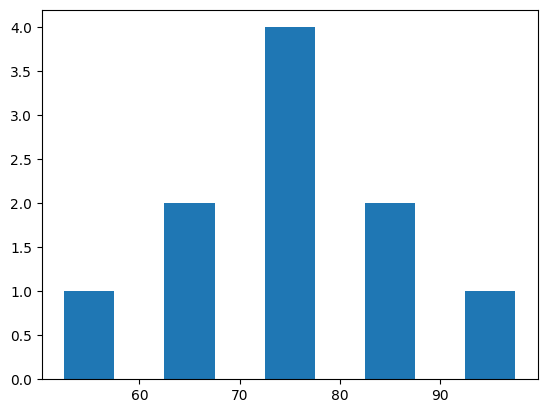

In [6]:
df = pd.DataFrame(data , columns=['name','record'])
plt.hist(df["record"], bins=5, range=[50,100],rwidth=0.5)
df.info()

In [7]:
print(np.mean(df["record"]))

73.5


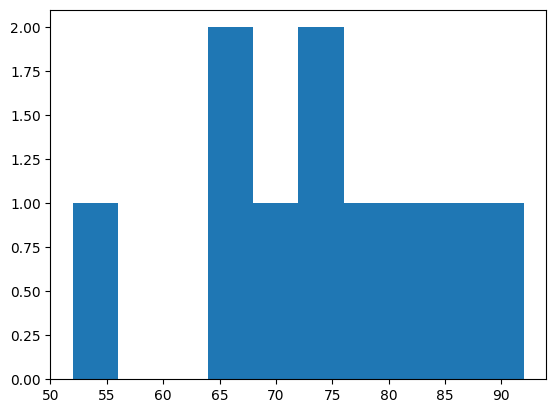

,name,record
0,A,52
1,B,92
2,C,84
3,D,71
4,M,65
5,YY,81
6,SK,66
7,BY,77
8,MS,73
9,BY,74


In [8]:
plt.hist(df["record"])
plt.show()
df

In [9]:
##[ 방법 1]  조건을 이용해서 구간을 직접 지정
df["class"] = 0    # class 컬럼을 생성하고 0 으로 초기화

df.loc[(df["record"] < 60), "class"] = "F"
df.loc[(df["record"] >= 60) & (df["record"] < 70), "class"] = "D"
df.loc[(df["record"] >= 70) & (df["record"] < 80), "class"] = "C"
df.loc[(df["record"] >= 80) & (df["record"] < 90), "class"] = "D"
df.loc[(df["record"] >= 90), "class"] = "A"
df


<ipython-input-9-91b1eb0e3bfe>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["record"] < 60), "class"] = "F"


,name,record,class
0,A,52,F
1,B,92,A
2,C,84,D
3,D,71,C
4,M,65,D
5,YY,81,D
6,SK,66,D
7,BY,77,C
8,MS,73,C
9,BY,74,C


In [10]:
##[ 방법 2]  cut() 함수 이용
## bins : 구간,
## label :등급
## include _lowest = True/ False (option 사용 가능)

df["class"] = pd.cut(df["record"], bins=[0,60,70,80,90,100], labels=["F","D","C","B","A"])
df

,name,record,class
0,A,52,F
1,B,92,A
2,C,84,B
3,D,71,C
4,M,65,D
5,YY,81,B
6,SK,66,D
7,BY,77,C
8,MS,73,C
9,BY,74,C


In [11]:
####[ 방법 3]  qcut() 함수 이용
### q 를 5 로 지정하면, 컴퓨터가 알아서 지정해 달라.

### cut과 qcut 과 비교해 보면 lable이 다른 것이 보일 수 있다.

df["class_qcut"] = pd.qcut(df["record"], q=5, labels=["F","D","C","B","A"])
df

,name,record,class,class_qcut
0,A,52,F,F
1,B,92,A,A
2,C,84,B,A
3,D,71,C,D
4,M,65,D,F
5,YY,81,B,B
6,SK,66,D,D
7,BY,77,C,B
8,MS,73,C,C
9,BY,74,C,C


표준 정규화  ( 데이터 scaling )

1) 표준 정규화 (표준화 )
2). Min-Max 정규화

변수들의 측정 단위가 다양할 때, 기준을 삼기 위해서 사용한다.


문제 제시 :  한국인 1000 명의 연간 육류 소비량이 54kg, 표준편차 5kg으로 정규 분포를 따르고,
 일본인 1000 명의 연간 육류 소비량이 32kg, 표준편차 4kg으 정규 분포를 따른다.

 두 집단의 육류 소비량을 평균이 0, 표준편차가 1인 표준정규분포로 표준화 를 해 본다.
 ,

In [12]:
import pandas as pd
import numpy as np



In [13]:
## 한국인, 일본인 각 성인 1000명 육류 소비량 데이터 생성

#meat_consumption_korean = np.random.normal(54, 5, 1000)
#meat_consumption_japan = np.random.normal(32, 4, 1000)
meat_consumption_korean = np.random.randn(1000) * 5 + 54
meat_consumption_japan = np.random.randn(1000) * 4 + 32


In [26]:
## data frame 생성
meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean, "일본인":meat_consumption_japan})

# 상위 6개 data 확인

meat_consumption.head(10)

,한국인,일본인
0,53.026959,39.621462
1,53.341092,31.678469
2,52.746480,39.775203
3,59.872508,30.645020
4,53.213211,28.951882
5,52.159684,30.778134
6,62.853554,30.477272
7,54.450230,23.058085
8,58.995932,36.020875
9,45.417265,32.444300


In [15]:
import matplotlib.pyplot as plt

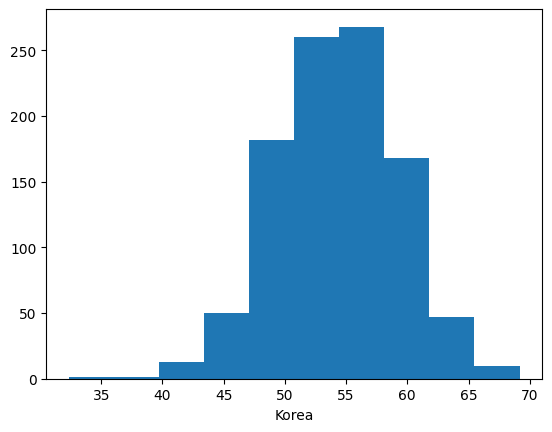

In [27]:
#한국인 육류 소비량 히스토그램
plt.hist(meat_consumption_korean)
plt.xlabel("Korea")
plt.show()

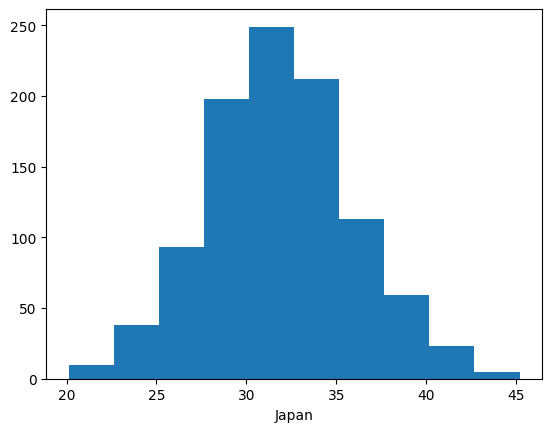

In [28]:
#일본인 육류 소비량 히스토그램
plt.hist(meat_consumption_japan)   ## rwidth 사용해 보기 .
plt.xlabel("Japan")
plt.show()


In [20]:
## 평균갑의 차이가 다름을 알 수 있다.
## 이것을 맞춰주는 작업을 해 준다.

In [29]:
## 1) z-표준화
## z- 표준화는 변수값에서 평균을 뺀 후 표준편차로 나누는 것으로, 변환 후 데이텨 평균은 0 , 표준 편차는 1이 된다.

In [25]:
## 방법1)  (x-np.mean(x))/np.std(x)

In [30]:
meat_consumption["한국인_정규화2"] = (meat_consumption["한국인"] - np.mean(meat_consumption["한국인"]))/np.std(meat_consumption["한국인"])
meat_consumption["일본인_정규화2"] = (meat_consumption["일본인"] - np.mean(meat_consumption["일본인"]))/np.std(meat_consumption["일본인"])
meat_consumption.head()

,한국인,일본인,한국인_정규화2,일본인_정규화2
0,53.026959,39.621462,-0.245564,1.893166
1,53.341092,31.678469,-0.181655,-0.049855
2,52.746480,39.775203,-0.302627,1.930774
3,59.872508,30.645020,1.147142,-0.302658
4,53.213211,28.951882,-0.207672,-0.716835


In [ ]:
## 결국은 정규 분포를 하기 위해서 단위를 통일 시키는 역할

In [31]:
## 방법 2)  scipy 패키지 zscore()


In [33]:
import scipy.stats as ss
meat_consumption["한국인_정규화"] = ss.zscore(meat_consumption_korean)
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)
meat_consumption.head()

,한국인,일본인,한국인_정규화2,일본인_정규화2,한국인_정규화,일본인_정규화
0,53.026959,39.621462,-0.245564,1.893166,-0.245564,1.893166
1,53.341092,31.678469,-0.181655,-0.049855,-0.181655,-0.049855
2,52.746480,39.775203,-0.302627,1.930774,-0.302627,1.930774
3,59.872508,30.645020,1.147142,-0.302658,1.147142,-0.302658
4,53.213211,28.951882,-0.207672,-0.716835,-0.207672,-0.716835


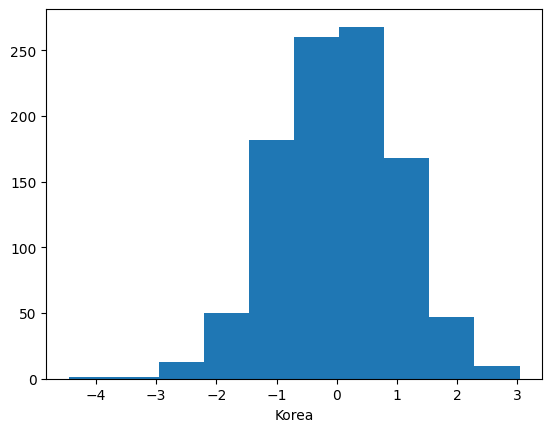

In [34]:
## 표준화된 data에 대한 히스토그램
plt.hist(meat_consumption["한국인_정규화"])
plt.xlabel("Korea")
plt.show()

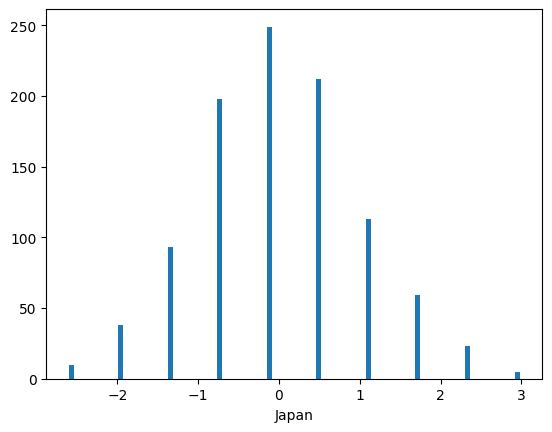

In [37]:
## 표준화된 data에 대한 히스토그램
plt.hist(meat_consumption["일본인_정규화"], rwidth=0.1)
plt.xlabel("Japan")
plt.show()

In [24]:
## 방법 3)  sckit-learn preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler   ## class를 include하는 것.

scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption_korean.reshape(-1,1))
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption_japan.reshape(-1,1))
meat_consumption.head()


,한국인,일본인,한국인_정규화2,일본인_정규화2,한국인_정규화,일본인_정규화,한국인_정규화3,일본인_정규화3
0,53.026959,39.621462,-0.245564,1.893166,-0.245564,1.893166,-0.245564,1.893166
1,53.341092,31.678469,-0.181655,-0.049855,-0.181655,-0.049855,-0.181655,-0.049855
2,52.746480,39.775203,-0.302627,1.930774,-0.302627,1.930774,-0.302627,1.930774
3,59.872508,30.645020,1.147142,-0.302658,1.147142,-0.302658,1.147142,-0.302658
4,53.213211,28.951882,-0.207672,-0.716835,-0.207672,-0.716835,-0.207672,-0.716835


In [ ]:
## 3가지 방법의 적용해도 결과는 동일하다. ####

2. MIN-MAX 정규화
 . 연속형 변수의 값을 0과 1 사이의 값을 변환
 . 스케일이 다른 두 변수를 상호간에 비교가 가능

In [39]:
## 방법1)   (x-np.min(x))/(np.max(x)-np.min(x))

In [40]:
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption["한국인_정규화4"] = (meat_consumption_korean - Min)/(Max - Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption["일본인_정규화4"] = (meat_consumption_japan - Min)/(Max - Min)
meat_consumption.head()


,한국인,일본인,한국인_정규화2,일본인_정규화2,한국인_정규화,일본인_정규화,한국인_정규화3,일본인_정규화3,한국인_정규화4,일본인_정규화4
0,53.026959,39.621462,-0.245564,1.893166,-0.245564,1.893166,-0.245564,1.893166,0.561761,0.778282
1,53.341092,31.678469,-0.181655,-0.049855,-0.181655,-0.049855,-0.181655,-0.049855,0.570289,0.461327
2,52.746480,39.775203,-0.302627,1.930774,-0.302627,1.930774,-0.302627,1.930774,0.554147,0.784417
3,59.872508,30.645020,1.147142,-0.302658,1.147142,-0.302658,1.147142,-0.302658,0.747599,0.420089
4,53.213211,28.951882,-0.207672,-0.716835,-0.207672,-0.716835,-0.207672,-0.716835,0.566818,0.352526


In [42]:
meat_consumption[["한국인","일본인","한국인_정규화4", "일본인_정규화4"]].head()

,한국인,일본인,한국인_정규화4,일본인_정규화4
0,53.026959,39.621462,0.561761,0.778282
1,53.341092,31.678469,0.570289,0.461327
2,52.746480,39.775203,0.554147,0.784417
3,59.872508,30.645020,0.747599,0.420089
4,53.213211,28.951882,0.566818,0.352526


In [16]:
## 방법2)  sckit-learn MinMaxScaler()

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

meat_consumption["한국인_정규화5"] = scaler.fit_transform(meat_consumption_korean.reshape(-1,1))
meat_consumption["일본인_정규화5"] = scaler.fit_transform(meat_consumption_japan.reshape(-1,1))

meat_consumption[["한국인","일본인", "한국인_정규화5","일본인_정규화5"]].head()

,한국인,일본인,한국인_정규화5,일본인_정규화5
0,53.026959,39.621462,0.561761,0.778282
1,53.341092,31.678469,0.570289,0.461327
2,52.746480,39.775203,0.554147,0.784417
3,59.872508,30.645020,0.747599,0.420089
4,53.213211,28.951882,0.566818,0.352526


In [ ]:
## 수식을 이용한 결과와  scikit-learn 이용한 결과가 동일한다는 것을 알 수 있다.